Authors = [
    "Dhruba Pujary (11576200)",
    "Tarun Krishna (11593040)"
]

In [1]:
import numpy as np
import bz2
import os
from collections import defaultdict
import json
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)

In [2]:
# define function to read pre-trained embeddings
def read_embedding(file_name):
    embedding=np.array([])
    w2i = defaultdict(lambda: len(w2i))
    with bz2.BZ2File(file_name, 'r') as datum:
        
        for iter_, line in enumerate(datum):
            
            if (iter_)%10000==0:
                print("Read {} lines".format(iter_))
                            
            line = line.strip().split()
            w2i[line[0].decode('UTF-8')]
            if iter_==0:
                embedding = np.array(list(map(float, line[1:])))
            else:
                embed = np.array(list(map(float, line[1:])))
                embedding = np.vstack((embedding, embed))
    return w2i, embedding

In [3]:
def load_model(model_name):
    model_path = 'model/{}'.format(model_name)
    if not os.path.isfile(model_path+'.npz'):
        print('reading embedding file')
        w2i, embedding = read_embedding("data/{}.bz2".format(model_name))
        
        norm_m = np.linalg.norm(embedding,axis=1,keepdims=True)
        
        datum ={"word_id":w2i, 'embedding':embedding, 'norm':norm_m}
        #save word indexes         
        with open(model_path+'.json', 'w') as outfile:  
            json.dump(w2i, outfile, indent=4)
        #
        np.savez(model_path+'.npz',embedding=embedding, norm_m=norm_m)
        
    else:
            print("loading Word-embeddings")
            with open(model_path+'.json') as json_file:  
                w2ind = json.load(json_file)
            data = np.load(model_path+'.npz')
            embedding, norm_m = data['embedding'], data['norm_m']
            data.close()
            print("done!!")
    return w2ind, embedding, norm_m
   

In [31]:
def index2word(w2i):
    i2w = dict()
    for key, value in w2i.items():
        i2w[value] = key
    return i2w

In [9]:
evaluation_data = ["data/SimLex-999","data/MEN"]


In [38]:
#Read SimLex-999
def simLex(filename):
    simlex_w = []
    dist_word = {}
    pair = []
    with open(filename, 'rb') as datum:
        data =datum.readlines()
        
    for _, line in enumerate(data[1:]):
        line = line.strip().split()
               
        pair = [(line[0].decode('UTF-8'), line[1].decode('UTF-8')),\
                (line[1].decode('UTF-8'), line[0].decode('UTF-8'))]
        for ind, word in enumerate(pair[:1]):
            simlex_w.append(word[0])
            simlex_w.append(word[1])
            if word[0] not in dist_word.keys():
                dist_word[word[0]] = []
                
            dist_word[word[0]].append((word[1], float(line[3])/10))
             
    #Sort the list
    for key, val in dist_word.items():
        val.sort(key=lambda _ : _[1], reverse=True)
    
    simlex_w = set(simlex_w)
    return dist_word, list(set(simlex_w))       
        
simlex, simlex_w = simLex("data/SimLex-999/SimLex-999.txt")

In [39]:
print(len(simlex.keys()),len(simlex_w))

616 1028


In [40]:
# Read MEN
def men_(filename):
    men_w=[]
    dist_word = {}
    norm_word = {}
    pair = []
    with open(filename, 'rb') as datum:
        data =datum.readlines()
        
    for _, line in enumerate(data):
        line = line.strip().split()
                             
        pair = [(line[0].decode('UTF-8'), line[1].decode('UTF-8')),\
                (line[1].decode('UTF-8'), line[0].decode('UTF-8'))]
        for ind, word in enumerate(pair[:1]):
            men_w.append(word[0])
            men_w.append(word[1])
            if word[0] not in dist_word.keys():
                dist_word[word[0]] = []
                norm_word[word[0]] = []
            dist_word[word[0]].append((word[1], float(line[2])))
    
    #normalizing scores in [0,1]
    for key, value in dist_word.items():
        normalized_sum = 0.0
        for _, score in value:
            normalized_sum += score
        for w, score in value:
            score = round(score/normalized_sum, 3)
            norm_word[key].append((w, score))
   
    #Sort the list
    for key, val in norm_word.items():
       
        val.sort(key=lambda _ : _[1], reverse=True)
    
    men_w = set(men_w)
    return dist_word, list(men_w)       
        
men, men_w = men_("data/MEN/MEN_dataset_natural_form_full")

In [41]:
np.intersect1d(simlex_w,men_w)

array(['action', 'air', 'airport', 'alley', 'ancient', 'apartment',
       'apple', 'arrow', 'baby', 'bacon', 'bag', 'ball', 'band', 'bar',
       'barn', 'baseball', 'basket', 'bath', 'bathroom', 'beach',
       'beauty', 'bed', 'bedroom', 'beef', 'beer', 'belly', 'bench',
       'bible', 'bicycle', 'birthday', 'boat', 'body', 'book', 'bottle',
       'bread', 'breakfast', 'brick', 'bride', 'bridge', 'bus', 'button',
       'camera', 'candy', 'canyon', 'car', 'card', 'cat', 'cathedral',
       'cattle', 'ceiling', 'chair', 'chapel', 'chicken', 'chocolate',
       'church', 'cigarette', 'cliff', 'clothes', 'cloud', 'club',
       'coast', 'cocktail', 'coffee', 'computer', 'cone', 'construction',
       'cop', 'cottage', 'couple', 'cow', 'crystal', 'curve', 'daughter',
       'dawn', 'day', 'decoration', 'diamond', 'dinner', 'dirt', 'dirty',
       'dog', 'door', 'dusk', 'engine', 'evening', 'fabric', 'fashion',
       'fence', 'flight', 'floor', 'fog', 'fun', 'furniture', 'game',
     

In [42]:
si = [i for i in simlex.keys()]
me = [i for i in men.keys()]

inter = np.intersect1d(si,me)
print(inter)

['action' 'air' 'alley' 'apartment' 'apple' 'baby' 'bacon' 'ball' 'band'
 'bar' 'bath' 'bathroom' 'beach' 'beauty' 'bed' 'beer' 'belly' 'bible'
 'bicycle' 'birthday' 'boat' 'body' 'book' 'bottle' 'bread' 'breakfast'
 'bride' 'camera' 'canyon' 'car' 'card' 'cat' 'cattle' 'ceiling' 'chair'
 'chicken' 'chocolate' 'church' 'cliff' 'clothes' 'cloud' 'club' 'cop'
 'cottage' 'couple' 'cow' 'curve' 'daughter' 'day' 'dinner' 'dirty' 'dog'
 'door' 'evening' 'floor' 'fun' 'game' 'glass' 'grass' 'guitar' 'gun'
 'guy' 'hand' 'happy' 'hat' 'heart' 'hill' 'home' 'horse' 'house' 'idea'
 'lady' 'lake' 'leg' 'lens' 'machine' 'man' 'meat' 'metal' 'milk'
 'monster' 'moon' 'mother' 'motor' 'mountain' 'movie' 'mud' 'muscle'
 'music' 'night' 'oak' 'old' 'paper' 'people' 'plane' 'rail' 'rain' 'rice'
 'river' 'roof' 'room' 'salad' 'school' 'sea' 'seed' 'shore' 'sky' 'snow'
 'storm' 'street' 'sun' 'tree']


In [43]:
print(simlex["beach"])
print()
print(men["beach"])

[('seashore', 0.833), ('island', 0.5599999999999999), ('sea', 0.46799999999999997), ('reef', 0.377)]

[('sand', 48.0), ('sea', 44.0), ('shore', 42.0), ('coast', 42.0), ('harbour', 41.0), ('swimming', 40.0), ('holiday', 35.0), ('scenery', 34.0), ('cliff', 33.0), ('pebbles', 30.0)]


In [44]:
eval_data = [(simlex, simlex_w,'SimLex-999'),(men, men_w, "MEN")]

In [12]:
# get all the word_embedding for particular dataset
def get_embedd(w2ind, embedding,norm_m, eval_word):
    word_id = []
    emb_word =[]
    
    w2i_eval =defaultdict(lambda: len(w2i_eval))
#     print("Total words in given data {}".format(len(eval_word)))
    for i,w in enumerate(eval_word):
        if w in w2ind.keys():
            
            word_id.append(w2ind[w])
            w2i_eval[w]
        else:
            continue
            print("word <==>{}<==> does not have embedding ".format(w))
    embedd_eval = embedding[word_id]
    norm_eval = norm_m[word_id]
#     print("Total words with their embedding are {}".format(len(w2i_eval.keys())))
    return embedd_eval, w2i_eval,norm_eval

In [13]:
# evaluate the model on both data_sets
def wordSim(w2ind, embedd_eval,  w2i_eval,norm_eval,embedding, word=None, n=None):
        
        word_vec = embedding[w2ind[word]]
#         print(word_vec.shape, embedd_eval.shape)
        score = np.dot(embedd_eval, word_vec)
        score = np.reshape(score, (len(score),1))*(1./norm_eval)*(1/np.linalg.norm(word_vec))
#         print(w2i_eval[word])
        ranking = [(key, round(score[w2i_eval[key]][0],4)) for key in w2i_eval.keys()]
#         print(ranking[0])
        ranking.sort(key=lambda _:_[1], reverse=True)
        #return from index 1 becoz highest score will the score of word with itself
        ranking = ranking[1:]
        return ranking[0:n]
 

In [47]:
def cal_coeff(eval_data, w2ind, embedding, norm_m, name=None):
    for item in eval_data[:]:
        print("running {} data".format(item[2]))
        eval_rank, eval_word = item[0], item[1]
        #print(len(eval_rank), len(eval_word))
        a = []
        b = []
        e_embed,w2i_eval, e_norm  = get_embedd(w2ind, embedding, norm_m, eval_word)

        #iterate over words in the evalution data to get similarity 
        for ind, word in enumerate(eval_rank.keys()):
            if word not in w2i_eval.keys():

                continue

            n = len(eval_rank[word])
            
            #get top-n ranking from trained embeddings from evalution data         
            score = wordSim(w2ind, e_embed, w2i_eval, e_norm, embedding, word)
            w_found  =[]
            for w, sc_ in eval_rank[word]:
                a.append(round(sc_, 3))
                w_found.append(w)
                       
            for w in w_found:
                for wskr_pair in score:
                    if w in wskr_pair:
                        b.append(wskr_pair[1]) 
            

        a, b = np.array(a), np.array(b)
        rho, _ = stats.spearmanr(a, b, axis = None)
        val, _ = stats.pearsonr(a, b)
        print()
        print(item[2], "<<<--->>>  ",name, "<---->"," Pearson Correlation ", round(val,4) )
        print(item[2], "<<<--->>>  ",name, "<---->"," Spearman Correlation ", round(rho,4) )
        print()
            
        plt.figure()
        plt.scatter(a, b)
        m,c = np.polyfit(a, b, 1) 

        plt.plot(a, m*np.array(a)+c, 'r--')
        plt.title(name)
        plt.grid(True)
        plt.show()
        
              
        
    

loading Word-embeddings
done!!
running SimLex-999 data

SimLex-999 <<<--->>>   bow2 embeddings <---->  Pearson Correlation  0.4285
SimLex-999 <<<--->>>   bow2 embeddings <---->  Spearman Correlation  0.4141



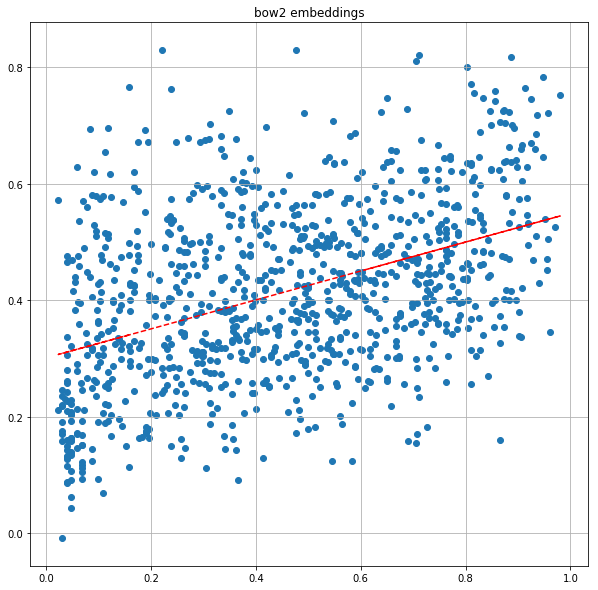

running MEN data

MEN <<<--->>>   bow2 embeddings <---->  Pearson Correlation  0.6777
MEN <<<--->>>   bow2 embeddings <---->  Spearman Correlation  0.6999



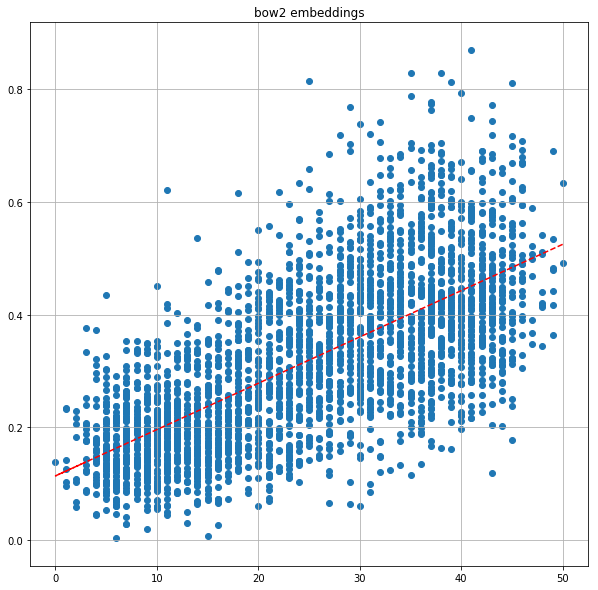

In [48]:
w2ind, embedding, norm_m = load_model('bow2.words') 
cal_coeff(eval_data, w2ind, embedding, norm_m, "bow2 embeddings")
del w2ind
del embedding

loading Word-embeddings
done!!
running SimLex-999 data

SimLex-999 <<<--->>>   bow5 embeddings <---->  Pearson Correlation  0.3756
SimLex-999 <<<--->>>   bow5 embeddings <---->  Spearman Correlation  0.3674



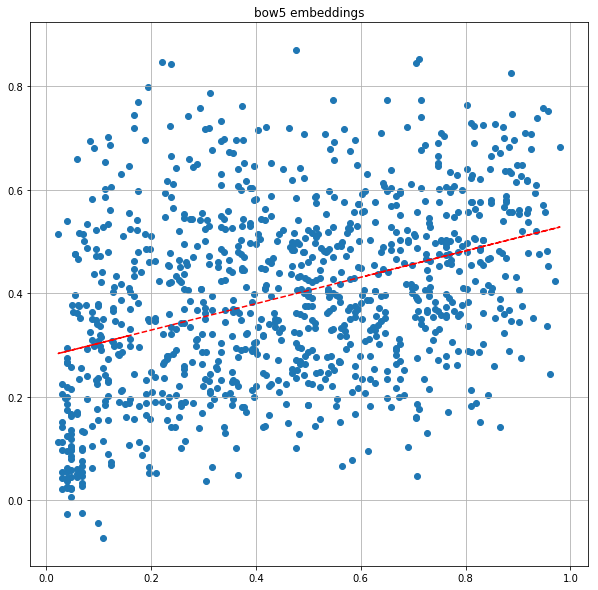

running MEN data

MEN <<<--->>>   bow5 embeddings <---->  Pearson Correlation  0.7082
MEN <<<--->>>   bow5 embeddings <---->  Spearman Correlation  0.7232



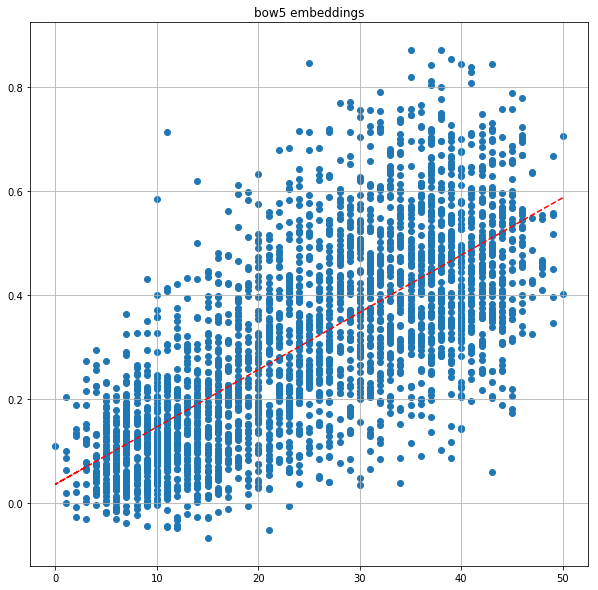

In [49]:
w2ind, embedding, norm_m = load_model('bow5.words') 
cal_coeff(eval_data, w2ind, embedding, norm_m, "bow5 embeddings")
del w2ind
del embedding

loading Word-embeddings
done!!
running SimLex-999 data

SimLex-999 <<<--->>>   dependence embeddings <---->  Pearson Correlation  0.4619
SimLex-999 <<<--->>>   dependence embeddings <---->  Spearman Correlation  0.4457



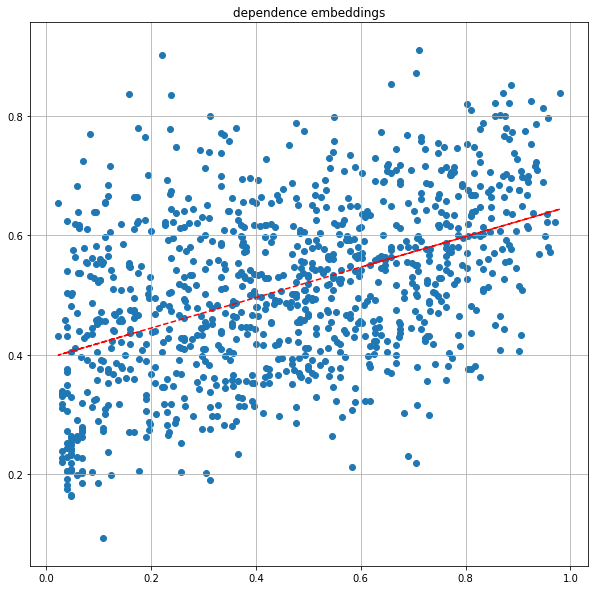

running MEN data

MEN <<<--->>>   dependence embeddings <---->  Pearson Correlation  0.5974
MEN <<<--->>>   dependence embeddings <---->  Spearman Correlation  0.6178



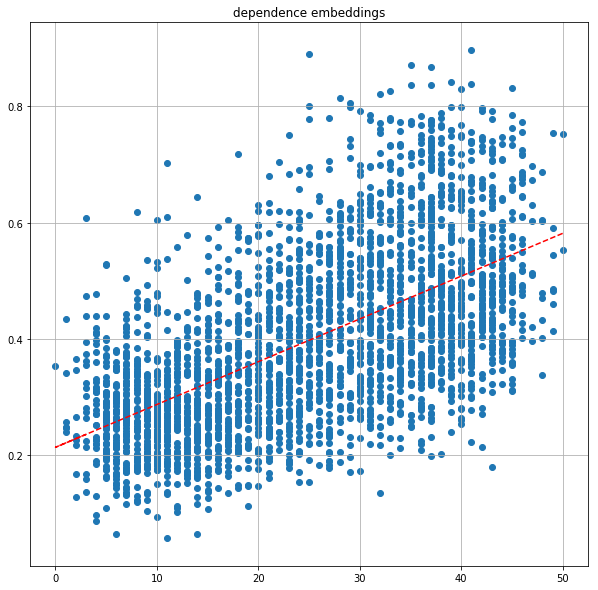

In [50]:
w2ind, embedding, norm_m = load_model('deps.words') 
cal_coeff(eval_data, w2ind, embedding, norm_m, "dependence embeddings")
del w2ind
del embedding

#### Analogy

In [6]:
def load_test(file_name):
    # read the test file and return the processed data
    # input:
    # file_name: input file name
    # output: list of list of queries in the format [a,b,c,d] for a:b::c:d analogy task
    with open(file_name, 'r') as f:
        t_lines = f.read().lower().split('\n')

    analogy = list(map(lambda x: x.split(), t_lines[0:]))

    return analogy

In [57]:
analogy = load_test('data/questions-words.txt')

def segmentData(analogy):
    
    analogy_dict = dict()
    dummy_list = []
    key = []
    for index, item in enumerate(analogy):
        if len(item) > 0 and item[0] == ':':
            analogy_dict[''.join(key)] = dummy_list
            key = item
            dummy_list = []
            continue
        dummy_list.append(item)
    
    analogy_dict[''.join(key)] = dummy_list
    
    return analogy_dict

analogy_dict = segmentData(analogy)

In [47]:
def predict_analogy(analogy, w2i, i2w, embedding, norm_m):

    mean_rr = 0
    mean_rr_w = 0
    correct = 0
    correct_w = 0
    predict_list = dict()

    for index, item in enumerate(analogy):
        num_items = len(item)
        if num_items > 0 and item[0] in w2i.keys():
            a_i = w2i[item[0]]
            a_emd = embedding[a_i]/norm_m[a_i]
        else:
            continue

        if num_items > 1 and item[1] in w2i.keys():
            b_i = w2i[item[1]]
            b_emd = embedding[b_i]/norm_m[b_i]
        else:
            continue

        if num_items > 2 and item[2] in w2i.keys():
            c_i = w2i[item[2]]
            c_emd = embedding[c_i]/norm_m[c_i]
        else:
            continue

        if num_items > 3 and item[3] in w2i.keys():
            d_i = w2i[item[3]]
        else:
            continue

        v = b_emd - a_emd

        d_test = c_emd + v
        d_test = d_test/ np.linalg.norm(d_test)
        
        cos_sim = np.dot(embedding, d_test)

        cos_sim = np.reshape(cos_sim, (1, -1))
        cos_sim = cos_sim.tolist()

        ranked_index = sorted(range(len(cos_sim[0])), key=lambda k: cos_sim[0][k], reverse=True)

        word_rank = [i+1 for i, word_i in enumerate(ranked_index) if word_i == d_i]
        word_rank_w = [i+1 for i, word_i in enumerate(ranked_index) if (word_i == d_i or word_i == a_i or word_i == b_i or word_i == c_i) and (word_rank[0] > i)]
        predict_list[(':').join(item)] = [str(i2w[word_i]) for i, word_i in enumerate(ranked_index) if i < word_rank[0] and word_i in i2w.keys()]

        mean_rr += 1/word_rank[0]

        if len(word_rank_w) > 1:
            mean_rr_w += 1/(word_rank[0] - len(word_rank_w) + 1)

        if d_i == ranked_index[0]:
            correct += 1
        else:
            if d_i == ranked_index[len(word_rank_w) - 1]:
                correct_w += 1

    mean_rr = mean_rr/len(analogy)
    mean_rr_w = mean_rr_w/len(analogy)

    accuracy = correct/len(analogy)
    accuracy_w = (correct + correct_w)/len(analogy)

    return mean_rr, mean_rr_w, accuracy, accuracy_w, predict_list

In [26]:
analogy = load_test('data/questions-words.txt')

file_name = 'deps.words'
w2i, embedding, norm_m = load_model(file_name)
i2w = index2word(w2i)

mean_rr1, mean_rr_w1, accuracy1, accuracy_w1, predict_list = predict_analogy(analogy, w2i, i2w, embedding, norm_m)

loading Word-embeddings
done!!


In [27]:
print("{0:15s}{1:10s}{2:10s}{3:10s}{4:10s}".format("","MRR","MRR 2","Accuracy","Accuracy 2"))
print("{0:10s}{1:10.3}{2:10.3}{3:10.3}{4:15.5}".format("Dependency",mean_rr1,mean_rr_w1,accuracy1,accuracy_w1))

               MRR       MRR 2     Accuracy  Accuracy 2
Dependency     0.237     0.411    0.0264        0.36062


In [28]:
analogy = load_test('data/questions-words.txt')

file_name = 'bow2.words'
w2i, embedding, norm_m = load_model(file_name)
i2w = index2word(w2i)

mean_rr2, mean_rr_w2, accuracy2, accuracy_w2, predict_list = predict_analogy(analogy, w2i, i2w, embedding, norm_m)

loading Word-embeddings
done!!


In [29]:
print("{0:15s}{1:10s}{2:10s}{3:10s}{4:10s}".format("","MRR","MRR 2","Accuracy","Accuracy 2"))
print("{0:10s}{1:10.3}{2:10.3}{3:10.3}{4:15.5}".format("Bow2",mean_rr2,mean_rr_w2,accuracy2,accuracy_w2))

               MRR       MRR 2     Accuracy  Accuracy 2
Bow2           0.367     0.575    0.0873         0.5838


In [30]:
analogy = load_test('data/questions-words.txt')

file_name = 'bow5.words'
w2i, embedding, norm_m = load_model(file_name)
i2w = index2word(w2i)

mean_rr3, mean_rr_w3, accuracy3, accuracy_w3, predict_list = predict_analogy(analogy, w2i, i2w, embedding, norm_m)

loading Word-embeddings
done!!


In [31]:
print("{0:15s}{1:10s}{2:10s}{3:10s}{4:10s}".format("","MRR","MRR 2","Accuracy","Accuracy 2"))
print("{0:10s}{1:10.3}{2:10.3}{3:10.3}{4:15.5}".format("Bow5",mean_rr3,mean_rr_w3,accuracy3,accuracy_w3))

               MRR       MRR 2     Accuracy  Accuracy 2
Bow5           0.407     0.597     0.102        0.61325


In [50]:
file_name = 'deps.words'
w2i, embedding, norm_m = load_model(file_name)
i2w = index2word(w2i)

for index,item in enumerate(analogy_dict):
    print(item)
    if len(analogy_dict[item]) < 1:
        continue
    mean_rr4, mean_rr_w4, accuracy4, accuracy_w4, predict_list = predict_analogy(analogy_dict[item], w2i, i2w, embedding, norm_m)
    print("{0:15s}{1:10s}{2:10s}{3:10s}{4:10s}".format("","MRR","MRR 2","Accuracy","Accuracy 2"))
    print("{0:10s}{1:10.3}{2:10.3}{3:10.3}{4:15.5}".format("Dependency",mean_rr4,mean_rr_w4,accuracy4,accuracy_w4))
    
    with open(file_name+str(index),'w',encoding="utf-8") as pred_file:
        pred_file.write(str(predict_list))

loading Word-embeddings
done!!

:capital-common-countries
               MRR       MRR 2     Accuracy  Accuracy 2
Dependency     0.215     0.492   0.00198        0.35178
:capital-world
               MRR       MRR 2     Accuracy  Accuracy 2
Dependency     0.108     0.202   0.00177        0.11207
:currency
               MRR       MRR 2     Accuracy  Accuracy 2
Dependency    0.0421    0.0585   0.00693        0.04388
:city-in-state
               MRR       MRR 2     Accuracy  Accuracy 2
Dependency      0.11     0.221       0.0        0.12282
:family
               MRR       MRR 2     Accuracy  Accuracy 2
Dependency     0.478     0.763    0.0909        0.81621
:gram1-adjective-to-adverb
               MRR       MRR 2     Accuracy  Accuracy 2
Dependency    0.0426    0.0599   0.00504       0.034274
:gram2-opposite
               MRR       MRR 2     Accuracy  Accuracy 2
Dependency     0.246     0.476       0.0        0.40025
:gram3-comparative
               MRR       MRR 2     Accuracy  Acc

In [51]:
file_name = 'bow2.words'
w2i, embedding, norm_m = load_model(file_name)
i2w = index2word(w2i)

for index,item in enumerate(analogy_dict):
    print(item)
    if len(analogy_dict[item]) < 1:
        continue
    mean_rr4, mean_rr_w4, accuracy4, accuracy_w4, predict_list = predict_analogy(analogy_dict[item], w2i, i2w, embedding, norm_m)
    print("{0:15s}{1:10s}{2:10s}{3:10s}{4:10s}".format("","MRR","MRR 2","Accuracy","Accuracy 2"))
    print("{0:10s}{1:10.3}{2:10.3}{3:10.3}{4:15.5}".format("BOW2",mean_rr4,mean_rr_w4,accuracy4,accuracy_w4))
    
    with open(file_name+str(index),'w',encoding="utf-8") as pred_file:
        pred_file.write(str(predict_list))

loading Word-embeddings
done!!

:capital-common-countries
               MRR       MRR 2     Accuracy  Accuracy 2
BOW2           0.546     0.651     0.229        0.83597
:capital-world
               MRR       MRR 2     Accuracy  Accuracy 2
BOW2           0.376     0.659    0.0597        0.63019
:currency
               MRR       MRR 2     Accuracy  Accuracy 2
BOW2          0.0639    0.0996   0.00924       0.084296
:city-in-state
               MRR       MRR 2     Accuracy  Accuracy 2
BOW2           0.198     0.497  0.000811        0.39238
:family
               MRR       MRR 2     Accuracy  Accuracy 2
BOW2           0.492     0.729     0.123        0.79447
:gram1-adjective-to-adverb
               MRR       MRR 2     Accuracy  Accuracy 2
BOW2           0.114     0.234   0.00202        0.15927
:gram2-opposite
               MRR       MRR 2     Accuracy  Accuracy 2
BOW2           0.212     0.414   0.00985        0.35591
:gram3-comparative
               MRR       MRR 2     Accuracy  Acc

In [52]:
file_name = 'bow5.words'
w2i, embedding, norm_m = load_model(file_name)
i2w = index2word(w2i)

for index,item in enumerate(analogy_dict):
    print(item)
    if len(analogy_dict[item]) < 1:
        continue
    mean_rr4, mean_rr_w4, accuracy4, accuracy_w4, predict_list = predict_analogy(analogy_dict[item], w2i, i2w, embedding, norm_m)
    print("{0:15s}{1:10s}{2:10s}{3:10s}{4:10s}".format("","MRR","MRR 2","Accuracy","Accuracy 2"))
    print("{0:10s}{1:10.3}{2:10.3}{3:10.3}{4:15.5}".format("BOW5",mean_rr4,mean_rr_w4,accuracy4,accuracy_w4))
    
    with open(file_name+str(index),'w',encoding="utf-8") as pred_file:
        pred_file.write(str(predict_list))

loading Word-embeddings
done!!

:capital-common-countries
               MRR       MRR 2     Accuracy  Accuracy 2
BOW5           0.596     0.741     0.223        0.94071
:capital-world
               MRR       MRR 2     Accuracy  Accuracy 2
BOW5            0.44      0.74    0.0588        0.70292
:currency
               MRR       MRR 2     Accuracy  Accuracy 2
BOW5          0.0775     0.101    0.0231       0.091224
:city-in-state
               MRR       MRR 2     Accuracy  Accuracy 2
BOW5           0.309      0.61    0.0113        0.51277
:family
               MRR       MRR 2     Accuracy  Accuracy 2
BOW5           0.523     0.697     0.172        0.81818
:gram1-adjective-to-adverb
               MRR       MRR 2     Accuracy  Accuracy 2
BOW5            0.14     0.267   0.00504        0.16935
:gram2-opposite
               MRR       MRR 2     Accuracy  Accuracy 2
BOW5           0.219     0.415    0.0172         0.3633
:gram3-comparative
               MRR       MRR 2     Accuracy  Acc

**Clustering word vectors**

In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random
plt.rcParams["figure.figsize"] = (20, 20)

In [14]:
with open('data/2000_nouns_sorted.txt', 'r')as dat_file:
    nouns = dat_file.read().strip().split('\n')
    
nouns = list(set(map(lambda _:_.strip(), nouns)))
random.shuffle(nouns)

In [15]:
def tsne_viz(embed_):
    print("Performing t-SNE")
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=500, random_state=23)
    vis_data = tsne_model.fit_transform(embed_)
    print("\t... done")
    
    return vis_data
    

def get_viz(w2_, emb_, n_m, nouns, num_words=None,title=None):
    
    embed_, w2, _= get_embedd(w2_, emb_, n_m, nouns[:num_words])
    print(len(w2))
    i2w = {}
    for key, val in w2.items():
        i2w[val]=key

    vis_data = tsne_viz(embed_)

    plt.scatter(vis_data[:, 0], vis_data[:, 1])

    i=0
    for x, y in zip( vis_data[:, 0], vis_data[:, 1]):
        plt.annotate(i2w[i], xy=(x, y), xytext=(0, 0), textcoords='offset points')
        i+=1
    plt.grid(True)    
    plt.title(title)    
    plt.show()
    plt.close()

loading Word-embeddings
done!!
500
Performing t-SNE
	... done


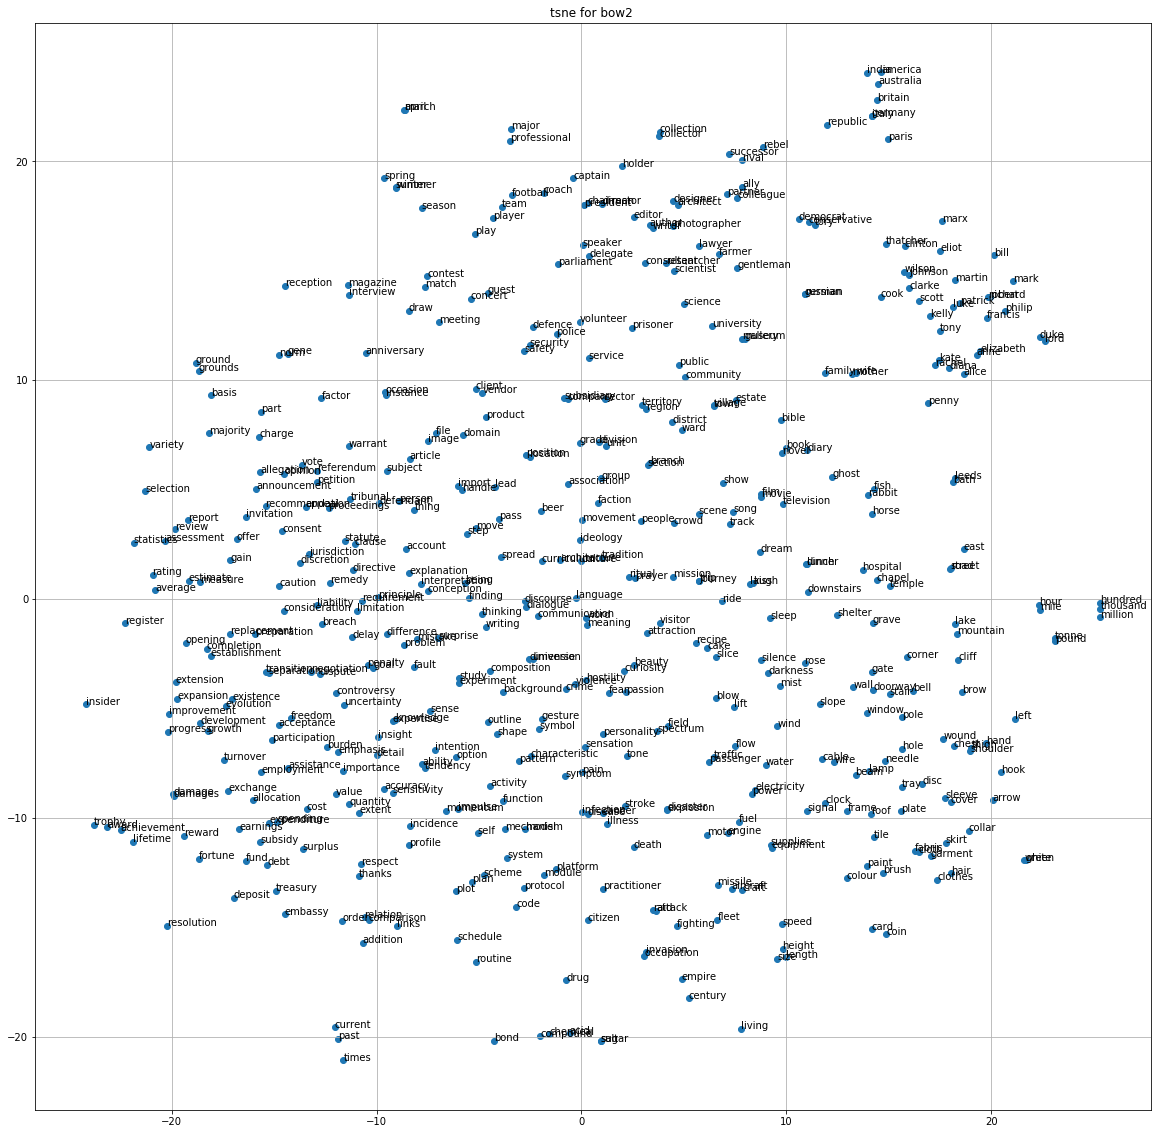

In [16]:
# Perform visualization for different embedding type
w2ind_2, embedding_2, norm_m_2 = load_model('bow2.words')
get_viz(w2ind_2, embedding_2, norm_m_2, nouns,500,"tsne for bow2 ")
del embedding_2
del w2ind_2

loading Word-embeddings
done!!
499
Performing t-SNE
	... done


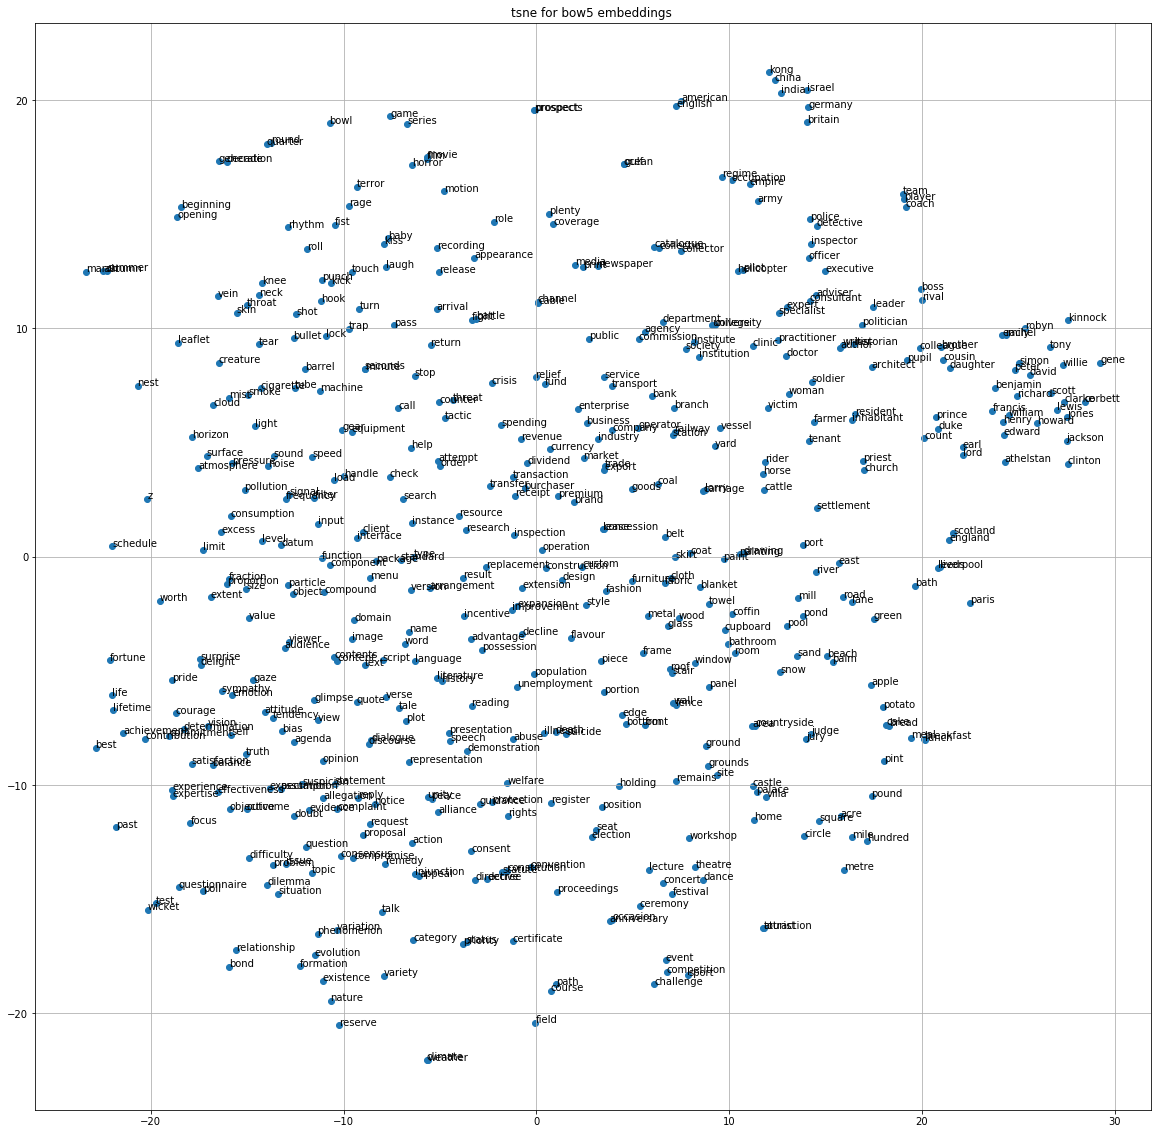

In [57]:
w2ind_5, embedding_5, norm_m_5 = load_model('bow5.words')
get_viz(w2ind_5, embedding_5, norm_m_5, nouns,500,"tsne for bow5 embeddings ")
del w2ind_5
del embedding_5

loading Word-embeddings
done!!
499
Performing t-SNE
	... done


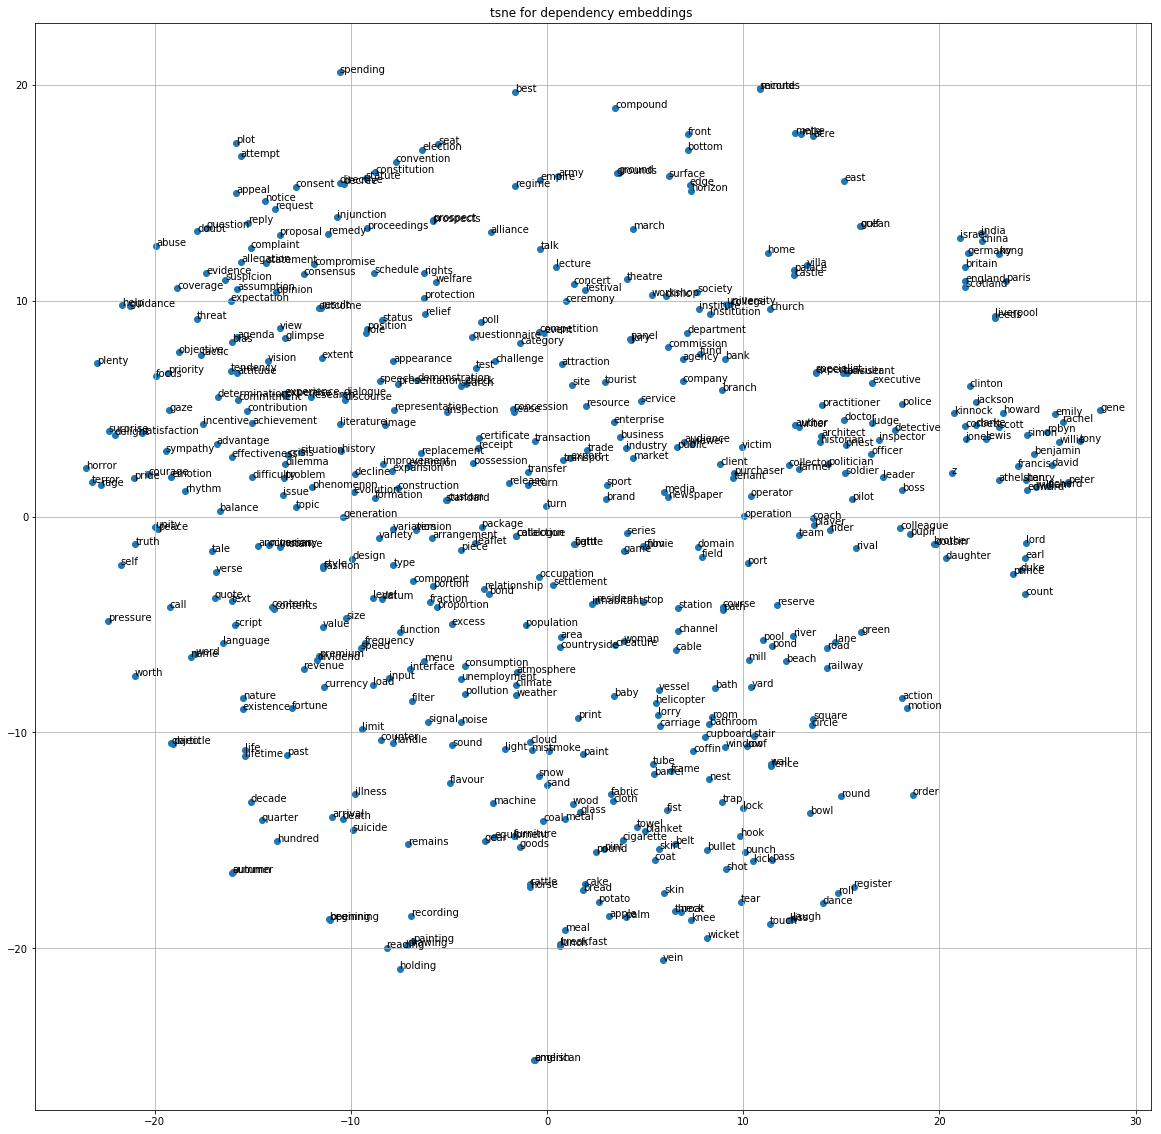

In [58]:
w2ind_d, embedding_d, norm_m_d = load_model('deps.words')
get_viz(w2ind_d, embedding_d, norm_m_d, nouns,500,"tsne for dependency embeddings ")
del w2ind_d
del embedding_d

** Clustering Nouns **

In [17]:
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from sklearn.manifold import MDS
from matplotlib.pyplot import cm 
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.palettes import d3,Plasma256, Viridis256
from sklearn import metrics
from bokeh.io import output_notebook
output_notebook()
plt.rcParams["figure.figsize"] = (20, 20)

Loading BokehJS ...

In [20]:

#find best clusters for each of the word embeddings
def get_best(w2_, emb_, n_m, nouns,clust=None,model=None):
    print()
    print("-------",model,"----------")
    print()
    embed_, w2, _= get_embedd(w2_, emb_, n_m, nouns)
    i2w = {}
    for key, val in w2.items():
        i2w[val]=key
    word_dict = {}    
    best_model = 0
    score =0 
    #Perform Clustering
    for num_clusters in clust:
        print("Trying Cluster of size {}".format(num_clusters))
        km = KMeans(n_clusters=num_clusters,n_init=20, random_state=42, max_iter=1000, n_jobs=-1)
        km.fit(embed_)
        clusters = km.labels_
        temp = metrics.silhouette_score(embed_, clusters)
        
        
        if temp > score:
            num_cls = num_clusters
            score = temp
            best_model = km
    
    print()
    print("Best score: ", score, "\nBest model: ", best_model, "\nnum of clusters", num_cls)
    
    print()
    
    for i,item in enumerate(embed_):
        if clusters[i] not in word_dict.keys():
            word_dict[clusters[i]] = []
        value = word_dict[clusters[i]]
        value.append(i2w[i])
        word_dict[clusters[i]] = value
        
    return embed_, best_model, num_cls, word_dict

def get_clusters(embed_, num_clusters, nouns,title=None):
    emb_tsne = tsne_viz(embed_)
    p = figure(tools="pan,wheel_zoom,reset,save",
               toolbar_location="above",
               title="T-SNE for most common words",plot_width=1000, plot_height=800)
    
    # Set colormap as a list
#     colormap = d3['Category20'][num_clusters]
#     colors = [colormap[i] for i in clusters]
    colors = [Viridis256[int(i)] for i in np.linspace(0,255, num_clusters)]

    source = ColumnDataSource(data=dict(x1=emb_tsne[:,0],
                                        x2=emb_tsne[:,1],
                                        names=nouns,
                                        colors=colors))

    p.scatter(x="x1", y="x2", size=5, source=source, color='colors')

    labels = LabelSet(x="x1", y="x2", text="names", y_offset=2,
                      text_font_size="8pt", text_color="#555555",
                      source=source,text_align='center')
    p.add_layout(labels)

    show(p)
    



In [27]:
w2ind_2, embedding_2, norm_m_2 = load_model('bow2.words')
embed_, model, num_clusters2, word_dict1 = get_best(w2ind_2, embedding_2, norm_m_2, nouns,[5,15,20,25,30,40,50, 60], "BoW2 embeddings")


loading Word-embeddings
done!!

------- BoW2 embeddings ----------

Trying Cluster of size 5
Trying Cluster of size 15
Trying Cluster of size 20
Trying Cluster of size 25
Trying Cluster of size 30
Trying Cluster of size 40
Trying Cluster of size 50
Trying Cluster of size 60

Best score:  0.027943709178643514 
Best model:  KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=50, n_init=20, n_jobs=-1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0) 
num of clusters 50



In [261]:
get_clusters(embed_,num_clusters2,nouns,"tsne for bow2 ")
del embedding_2
del w2ind_2

Performing t-SNE
	... done


C:\Users\Druv\Anaconda3\envs\NLP\lib\site-packages\bokeh\models\sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('colors', 60), ('names', 1996), ('x1', 1995), ('x2', 1995)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


In [28]:
w2ind_5, embedding_5, norm_m_5 = load_model('bow5.words')
embed_, model, num_clusters5,word_dict2 = get_best(w2ind_5, embedding_5, norm_m_5, nouns,[5,15,20,25,30,40,50, 60], "BoW5 embeddings")


loading Word-embeddings
done!!

------- BoW5 embeddings ----------

Trying Cluster of size 5
Trying Cluster of size 15
Trying Cluster of size 20
Trying Cluster of size 25
Trying Cluster of size 30
Trying Cluster of size 40
Trying Cluster of size 50
Trying Cluster of size 60

Best score:  0.03596993213006383 
Best model:  KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=30, n_init=20, n_jobs=-1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0) 
num of clusters 30



In [263]:
get_clusters(embed_,num_clusters5,nouns,"tsne for bow5 ")
del embedding_5
del w2ind_5

Performing t-SNE
	... done


C:\Users\Druv\Anaconda3\envs\NLP\lib\site-packages\bokeh\models\sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('colors', 60), ('names', 1996), ('x1', 1995), ('x2', 1995)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


In [29]:
w2ind_d, embedding_d, norm_m_d = load_model('deps.words')
embed_, model, num_clustersd,word_dict3 = get_best(w2ind_d, embedding_d, norm_m_d, nouns,[5,15,20,25,30,40,50, 60], "Dependency embeddings")

loading Word-embeddings
done!!

------- Dependency embeddings ----------

Trying Cluster of size 5
Trying Cluster of size 15
Trying Cluster of size 20
Trying Cluster of size 25
Trying Cluster of size 30
Trying Cluster of size 40
Trying Cluster of size 50
Trying Cluster of size 60

Best score:  0.032178014503622655 
Best model:  KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=40, n_init=20, n_jobs=-1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0) 
num of clusters 40



In [268]:
get_clusters(embed_,num_clustersd,nouns,"tsne for deps ")
del w2ind_d
del embedding_d

Performing t-SNE
	... done


C:\Users\Druv\Anaconda3\envs\NLP\lib\site-packages\bokeh\models\sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('colors', 60), ('names', 1996), ('x1', 1995), ('x2', 1995)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


In [31]:
print("Random samples from BOW2")
for i in range(num_clusters2):
    print(word_dict1[i])
    print("*******************************************")

Random samples from BOW2
['duke', 'lord', 'count', 'king', 'emperor', 'queen', 'knight', 'earl', 'princess', 'lady', 'prince']
*******************************************
['uncertainty', 'respect', 'fear', 'hostility', 'curiosity', 'burden', 'surprise', 'caution', 'favour', 'difficulty', 'attention', 'pride', 'sympathy', 'satisfaction', 'embarrassment', 'excitement', 'disappointment', 'danger', 'frustration', 'responsibility', 'enthusiasm', 'pleasure', 'doubt', 'expectation', 'confusion', 'contempt', 'hope', 'interest', 'confidence', 'bias', 'concern', 'guilt', 'trouble', 'suspicion', 'delight', 'anger']
*******************************************
['wound', 'cancer', 'gene', 'stroke', 'hair', 'heart', 'corpse', 'body', 'tongue', 'brain', 'skin', 'surgery', 'vein', 'limb', 'tooth', 'blood', 'spine', 'leaf', 'bone', 'stomach', 'muscle', 'tissue', 'throat', 'cell', 'root', 'breast', 'stem', 'nerve']
*******************************************
['importance', 'achievement', 'lifetime', 'goa

In [32]:
print("Random samples from BOW5")
for i in range(num_clusters5):
    print(word_dict2[i])
    print("*******************************************")

Random samples from BOW5
['beer', 'sugar', 'salt', 'cream', 'bottle', 'juice', 'coffee', 'potato', 'apple', 'drink', 'grain', 'fruit', 'alcohol', 'ingredient', 'champagne', 'wine', 'cigarette', 'milk', 'flavour']
*******************************************
['addition', 'difference', 'comparison', 'relation', 'being', 'favour', 'distinction', 'combination', 'connection', 'relative', 'contact', 'relationship', 'contrast', 'handful', 'equivalent', 'manner', 'contradiction', 'representation', 'interaction', 'response']
*******************************************
['conception', 'finding', 'interpretation', 'basis', 'meaning', 'principle', 'extent', 'sense', 'thinking', 'premise', 'proof', 'view', 'perspective', 'hypothesis', 'thought', 'approach', 'evidence', 'sort', 'tactic', 'concept', 'impression', 'theory', 'implication', 'objective', 'belief', 'logic', 'motive', 'compromise', 'expectation', 'kind', 'validity', 'notion', 'possibility', 'understanding', 'necessity', 'assumption', 'conclu

In [33]:
print("Random samples from Deps")
for i in range(num_clustersd):
    print(word_dict3[i])
    print("*******************************************")

Random samples from Deps
['past', 'conservative', 'major', 'professional', 'public', 'german', 'grade', 'current', 'russian', 'other', 'french', 'american', 'prime', 'black', 'present', 'future', 'second', 'secret', 'best', 'english', 'christian', 'joint']
*******************************************
['order', 'clause', 'scheme', 'statute', 'directive', 'curriculum', 'schedule', 'bill', 'resolution', 'plan', 'policy', 'project', 'provision', 'contract', 'strategy', 'agenda', 'legislation', 'constitution', 'proposal', 'campaign', 'arrangement', 'rule', 'initiative', 'charter', 'effort', 'treaty', 'programme', 'program', 'partnership', 'guideline', 'agreement', 'decree', 'amendment']
*******************************************
['paint', 'lift', 'handle', 'slice', 'track', 'brush', 'ride', 'play', 'blow', 'hook', 'cook', 'tear', 'roll', 'bomb', 'slide', 'forward', 'stitch', 'pack', 'fight', 'cast', 'stick', 'shot', 'contact', 'crack', 'trick', 'load', 'holding', 'punch', 'grip', 'cross', '